<a href="https://colab.research.google.com/github/vahedshaik/Assignment4/blob/main/classification_with_naive_bayes_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization purposes
import seaborn as sns # statistical data visualization
%matplotlib inline

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
df = pd.read_csv('/content/spam.csv', encoding = "ISO-8859-1")
df = df.drop(df.columns[range(2,5)], axis =1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Data Exporation and Analysis**

First and foremost, let's check for any missing values in the dataset.

In [ ]:
df_value_counts = df['v1'].value_counts()
df_value_counts
df_value_counts.isnull().sum()

0

**Plotting the data**

Firstly, let's get a sense of the amount of values within each category.

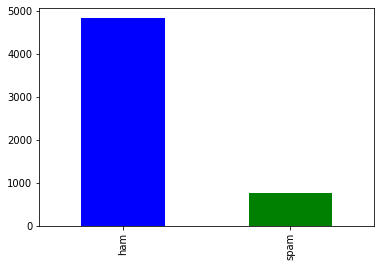

In [ ]:
df_value_counts.plot.bar(color=['blue', 'green'])

In [ ]:
from collections import Counter
ham_ct  = Counter(" ".join(df[df['v1']=='ham']["v2"]).split()).most_common(30)
spam_ct = Counter(" ".join(df[df['v1']=='spam']["v2"]).split()).most_common(30)

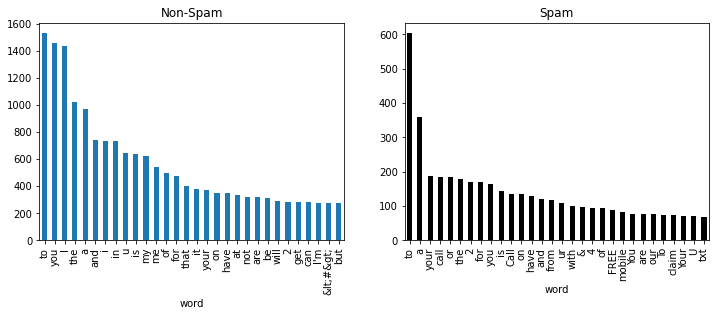

In [ ]:
df_ham = pd.DataFrame.from_dict(ham_ct)
df_ham = df_ham.rename(columns={0: "word", 1 : "count"})
df_spam = pd.DataFrame.from_dict(spam_ct)
df_spam = df_spam.rename(columns={0: "word", 1 : "count"})

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
df_ham.plot.bar(x='word', y='count', legend=False, ax=axes[0])
df_spam.plot.bar(x='word', y='count', color='black', legend=False, ax=axes[1])

axes[0].set_title('Non-Spam')
axes[1].set_title('Spam')

plt.show()

**Feature Engineering**

This part, called feature engineering, is where we need to transform the raw dataset's data into usable features.

When dealing with text data from any source (email, SMS, etc) we need to vectrize this input into a representation called Bag of words.

This turns the input documents (corpus) into numerical representations, described by the amount of word occurrences.

As we saw earlier, these documents have various words that should have minimal influence, which are called stop words. We need to re-weight these

numerical representations into float values, which are more suitable into a classifier.

This technique is called tf-idf transform (term-frequency) and together with the occurences counter are combined in a single sklearn vectorizer.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

transformer = TfidfVectorizer(stop_words = 'english')
X = transformer.fit_transform(df["v2"])
np.shape(X)

(5572, 8404)

**Data preparation**

It is time to split the dataset into train and test sets. Before we do that, we should replace the words 'spam' and 'ham' into binary

In [ ]:
from sklearn.model_selection import train_test_split

# Extract features and prediction vectors
y = df['v1'].map({'ham':0, 'spam':1})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape

((3900, 8404), (1672, 8404))

**Model creation and training**

Let's initialize our two models, the MultinomialNB and the BernoulliNB. After initialization we fit the models to the data and record their scores for the prediction analysis.

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
score_train_mnb = mnb.score(X_train, y_train)
score_test_mnb  = mnb.score(X_test,  y_test)
    
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
score_train_bnb = bnb.score(X_train, y_train)
score_test_bnb  = bnb.score(X_test,  y_test)

**Prediction Analysis**

The first thing we should do is to find what is the null accuracy. This value is the accuracy achieved by always selecting the most frequent class. To compute it we calculate the

occurences of the most frequent class, and divide by the total occurences of the test set. After that we go ahead and compute the mean accuracy for the train and test sets for both NB models.

In [ ]:
print(f'{y_test.value_counts()}\n')

null_accuracy = (1434/(1434+238))
print('Null accuracy score: {0:0.4f}\n'.format(null_accuracy))

print("MultinomialNB:\n-> Train set: {}\n-> Test set:  {}".format(score_train_mnb, score_test_mnb))
print("BernoulliNB:\n-> Train set: {}\n-> Test set:  {}".format(score_train_bnb, score_test_bnb))

0    1434
1     238
Name: v1, dtype: int64

Null accuracy score: 0.8577

MultinomialNB:
-> Train set: 0.9794871794871794
-> Test set:  0.9593301435406698
BernoulliNB:
-> Train set: 0.9833333333333333
-> Test set:  0.9659090909090909


As we can see both models perform really well in classifing spam from non spam, with the Bernoulli model perfoming a little bit better. Also both model accuracies are

above the null accuracy value, which means they are good in classifing the specific task at hand.

**Confusion Matrix**

To further boost our confidence into these models we should use other metric tools for the underlying performance of the models. A well known tool is called the confusion matrix.

The confusion matrix is a  2×2  table that contains 4 outputs as a result of a binary classifier. There are four outcomes: TP, FP, TN, FN. In more detail:

True Positives (TP)
False Positives (FP)
True Negatives (TN)
False Negatives (FN)

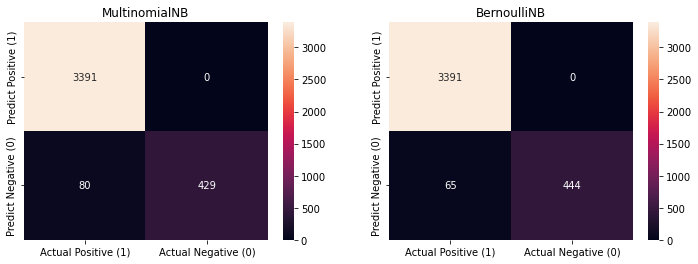

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_train_mnb = mnb.predict(X_train.toarray())
y_pred_train_bnb = bnb.predict(X_train.toarray())

cm_mnb_vals = confusion_matrix(y_train, y_pred_train_mnb)
cm_bnb_vals = confusion_matrix(y_train, y_pred_train_bnb)

cm_mnb = pd.DataFrame(data=cm_mnb_vals, columns=['Actual Positive (1)', 'Actual Negative (0)'], 
                                        index=['Predict Positive (1)', 'Predict Negative (0)'])
cm_bnb = pd.DataFrame(data=cm_bnb_vals, columns=['Actual Positive (1)', 'Actual Negative (0)'], 
                                        index=['Predict Positive (1)', 'Predict Negative (0)'])

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].set_title('MultinomialNB')
axes[1].set_title('BernoulliNB')

sns.heatmap(cm_mnb, annot=True, fmt='d', ax=axes[0])
sns.heatmap(cm_bnb, annot=True, fmt='d', ax=axes[1])

plt.show()

**Classification Measures**

From the confusion matrix we can derive several classification measures:

1. Accuracy
This term tells us how many right predictions were made.

TP+TNTP+FP+TN+FN 

2. Error Rate
This term tells us how many wrong predictions were made.

FP+FNTP+FP+TN+FN 

3. Precision
Explains how many, of the predictions that were marked as positive, are actually truly positive.

TPTP+FP 

4. Sensitivity (Recall or True positive rate)
This term is a measure of how well the classifier can identify true positives.

TPTP+FN 

5. Specificity (True Negative rate)
This term is a measure of how well the classifier can identify true negatives.

TNTN+FP 

6. F1-Score (Harmonic mean of precision and recall)
This score can be interpreted as a weighted harmonic mean of the precision and recall. It maxes out when Recall = Precision.

2∗Precision∗RecallPrecision+Recall 




In [ ]:
# Classification measures for MultinomialNB
mnb_TP = cm_mnb_vals[0,0]
mnb_FP = cm_mnb_vals[0,1]
mnb_TN = cm_mnb_vals[1,1]
mnb_FN = cm_mnb_vals[1,0]

mnb_accuracy    = (mnb_TP + mnb_TN) / float(mnb_TP + mnb_TN + mnb_FP + mnb_FN)
mnb_error       = (mnb_FP + mnb_FN) / float(mnb_TP + mnb_TN + mnb_FP + mnb_FN)
mnb_precision   = mnb_TP / float(mnb_TP + mnb_FP)
mnb_recall      = mnb_TP / float(mnb_TP + mnb_FN)
mnb_specificity = mnb_TN / float(mnb_TN + mnb_FP)
mnb_f1          = 2 * (mnb_precision * mnb_recall) / (mnb_precision + mnb_recall)

print(f'MultinomialNB Accuracy:    {mnb_accuracy:.4f}')
print(f'MultinomialNB Error:       {mnb_error:.4f}')
print(f'MultinomialNB Precision:   {mnb_precision:.4f}')
print(f'MultinomialNB Recall:      {mnb_recall:.4f}')
print(f'MultinomialNB Specificity: {mnb_specificity:.4f}')
print(f'MultinomialNB F1-Score:    {mnb_f1:.4f}\n')

# Classification measures for BernoulliNB
bnb_TP = cm_bnb_vals[0,0]
bnb_FP = cm_bnb_vals[0,1]
bnb_TN = cm_bnb_vals[1,1]
bnb_FN = cm_bnb_vals[1,0]

bnb_accuracy    = (bnb_TP + bnb_TN) / float(bnb_TP + bnb_TN + bnb_FP + bnb_FN)
bnb_error       = (bnb_FP + bnb_FN) / float(bnb_TP + bnb_TN + bnb_FP + bnb_FN)
bnb_precision   = bnb_TP / float(bnb_TP + bnb_FP)
bnb_recall      = bnb_TP / float(bnb_TP + bnb_FN)
bnb_specificity = bnb_TN / float(bnb_TN + bnb_FP)
bnb_f1          = 2 * (bnb_precision * bnb_recall) / (bnb_precision + bnb_recall)

print(f'BernoulliNB Accuracy:    {bnb_accuracy:.4f}')
print(f'BernoulliNB Error:       {bnb_error:.4f}')
print(f'BernoulliNB Precision:   {bnb_precision:.4f}')
print(f'BernoulliNB Recall:      {bnb_recall:.4f}')
print(f'BernoulliNB Specificity: {bnb_specificity:.4f}')
print(f'BernoulliNB F1-Score:    {bnb_f1:.4f}')

MultinomialNB Accuracy:    0.9795
MultinomialNB Error:       0.0205
MultinomialNB Precision:   1.0000
MultinomialNB Recall:      0.9770
MultinomialNB Specificity: 1.0000
MultinomialNB F1-Score:    0.9883

BernoulliNB Accuracy:    0.9833
BernoulliNB Error:       0.0167
BernoulliNB Precision:   1.0000
BernoulliNB Recall:      0.9812
BernoulliNB Specificity: 1.0000
BernoulliNB F1-Score:    0.9905


As we can see from the metrics, the Bernoulli model behaves better in all aspects of the prediction process. It has better accuracy and lower error rate.

In addition the BernoulliNB has better recall, meaning it is better in identifying true positives, and as a result gives a better F1-Score.

In [ ]:
mnb_y_pred = mnb.predict_proba(X_test)[:, 1]
bnb_y_pred = bnb.predict_proba(X_test)[:, 1]

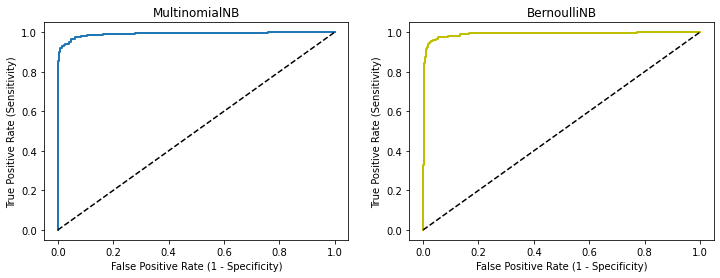

In [ ]:
from sklearn.metrics import roc_curve

mnb_FPR, mnb_TPR, mnb_thresholds = roc_curve(y_test, mnb_y_pred)
bnb_FPR, bnb_TPR, bnb_thresholds = roc_curve(y_test, bnb_y_pred)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].set_title('MultinomialNB')
axes[1].set_title('BernoulliNB')

axes[0].plot(mnb_FPR, mnb_TPR, linewidth=2)
axes[0].plot([0,1], [0,1], 'k--' )
axes[0].set_xlabel('False Positive Rate (1 - Specificity)')
axes[0].set_ylabel('True Positive Rate (Sensitivity)')

axes[1].plot(bnb_FPR, bnb_TPR, linewidth=2, color='y')
axes[1].plot([0,1], [0,1], 'k--' )
axes[1].set_xlabel('False Positive Rate (1 - Specificity)')
axes[1].set_ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

mnb_AUC = roc_auc_score(y_test, mnb_y_pred)
bnb_AUC = roc_auc_score(y_test, bnb_y_pred)

print(f'MultinomialNB AUC: {mnb_AUC:.4f}')
print(f'BernoulliNB AUC:   {bnb_AUC:.4f}')

MultinomialNB AUC: 0.9914
BernoulliNB AUC:   0.9903


**Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

mnb_cv_accuracy = cross_val_score(mnb, X_train, y_train, cv = 10, scoring = 'accuracy')
mnb_cv_recall   = cross_val_score(mnb, X_train, y_train, cv = 10, scoring = 'recall')
mnb_cv_f1       = cross_val_score(mnb, X_train, y_train, cv = 10, scoring = 'f1')
mnb_cv_ROC      = cross_val_score(mnb, X_train, y_train, cv = 10, scoring = 'roc_auc')
print('MultinomialNB Cross-Validation:')
print(f'-> Accuracy: {mnb_cv_accuracy.mean():.4f}')
print(f'-> Recall:   {mnb_cv_recall.mean():.4f}')
print(f'-> F1-Score: {mnb_cv_f1.mean():.4f}')
print(f'-> ROC AUC:  {mnb_cv_ROC.mean():.4f}')

print()
bnb_cv_accuracy = cross_val_score(bnb, X_train, y_train, cv = 10, scoring = 'accuracy')
bnb_cv_recall   = cross_val_score(bnb, X_train, y_train, cv = 10, scoring = 'recall')
bnb_cv_f1       = cross_val_score(bnb, X_train, y_train, cv = 10, scoring = 'f1')
bnb_cv_ROC      = cross_val_score(bnb, X_train, y_train, cv = 10, scoring = 'roc_auc')
print('BernoulliNB Cross-Validation:')
print(f'-> Accuracy: {bnb_cv_accuracy.mean():.4f}')
print(f'-> Recall:   {bnb_cv_recall.mean():.4f}')
print(f'-> F1-Score: {bnb_cv_f1.mean():.4f}')
print(f'-> ROC AUC:  {bnb_cv_ROC.mean():.4f}')

MultinomialNB Cross-Validation:
-> Accuracy: 0.9644
-> Recall:   0.7268
-> F1-Score: 0.8395
-> ROC AUC:  0.9871

BernoulliNB Cross-Validation:
-> Accuracy: 0.9744
-> Recall:   0.8153
-> F1-Score: 0.8916
-> ROC AUC:  0.9927


In [ ]:
from sklearn.model_selection import GridSearchCV

param={'alpha': np.arange(0.01, 1, 0.01)}

mnb_grid_search = GridSearchCV(mnb, param, cv=10, scoring="accuracy", return_train_score=True, n_jobs=-1)
mnb_grid_search.fit(X_train,y_train)

bnb_grid_search = GridSearchCV(bnb, param, cv=10, scoring="accuracy", return_train_score=True, n_jobs=-1)
bnb_grid_search.fit(X_train,y_train)

mnb.set_params(alpha = mnb_grid_search.best_params_['alpha'])
bnb.set_params(alpha = bnb_grid_search.best_params_['alpha'])

print(f'MultinomialNB\n-> Best Alpha: {mnb_grid_search.best_params_["alpha"]}\n-> Mean Accuracy Score: {cross_val_score(mnb, X_train, y_train, cv = 10, scoring="accuracy").mean():.4f}')
print(f'BernoulliNB\n-> Best Alpha: {bnb_grid_search.best_params_["alpha"]}\n-> Mean Accuracy Score: {cross_val_score(bnb, X_train, y_train, cv = 10, scoring="accuracy").mean():.4f}')

MultinomialNB
-> Best Alpha: 0.2
-> Mean Accuracy Score: 0.9821
BernoulliNB
-> Best Alpha: 0.02
-> Mean Accuracy Score: 0.9849


**Results**

As we can see from all the performance metrics, both models behave very similarly to unseen data. We notice that the BernoulliNB model is better by a tiny margin in all scores.

We also saw that using cross-validation yields a better understanding of each model's predictive power, even though we didn't notice much of an accuracy increase compared to the simple train-test split.

We also performed a grid search in order to identify the best  α  hyperparameter for each model, boosting their predictive power.

